# Task 7: Time Series Breakdown of Retail Sales
### Internship Project – Elevvo

This notebook analyzes Walmart’s retail sales dataset using Python (Pandas, Matplotlib, Seaborn).

## Steps:
1. Data Loading
2. Data Cleaning & Preparation
3. Summary Statistics
4. Time Series Analysis
5. Visualizations (trends, moving averages, seasonal patterns)
6. Revenue Breakdown by Product and Store
7. Conclusions

## Initialization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import warnings


sns.set_style("whitegrid")
# Silencing futurewarning to clean up output
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 1: Data Loading

In [12]:
df = pd.read_csv("train.csv", parse_dates=['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Step 2: Data Cleaning & Preparation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [14]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

### No missing values in train.csv for our columns

## Step 3: Summary Statistics

In [15]:
df.describe()

,Store,Dept,Date,Weekly_Sales
count,421570.000000,421570.000000,421570,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000
std,12.785297,30.492054,NaN,22711.183519


## Step 4: Time Series Analysis

In [16]:
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

monthly_sales = df['Weekly_Sales'].resample('ME').sum()
monthly_sales_millions = monthly_sales / 1e6 # Convert sales to millions
monthly_sales_millions.head()

Date
2010-02-28    190.332983
2010-03-31    181.919803
2010-04-30    231.412368
2010-05-31    186.710934
2010-06-30    192.246172
Freq: ME, Name: Weekly_Sales, dtype: float64

## Step 5: Visualizations
### Monthly Sales Trend

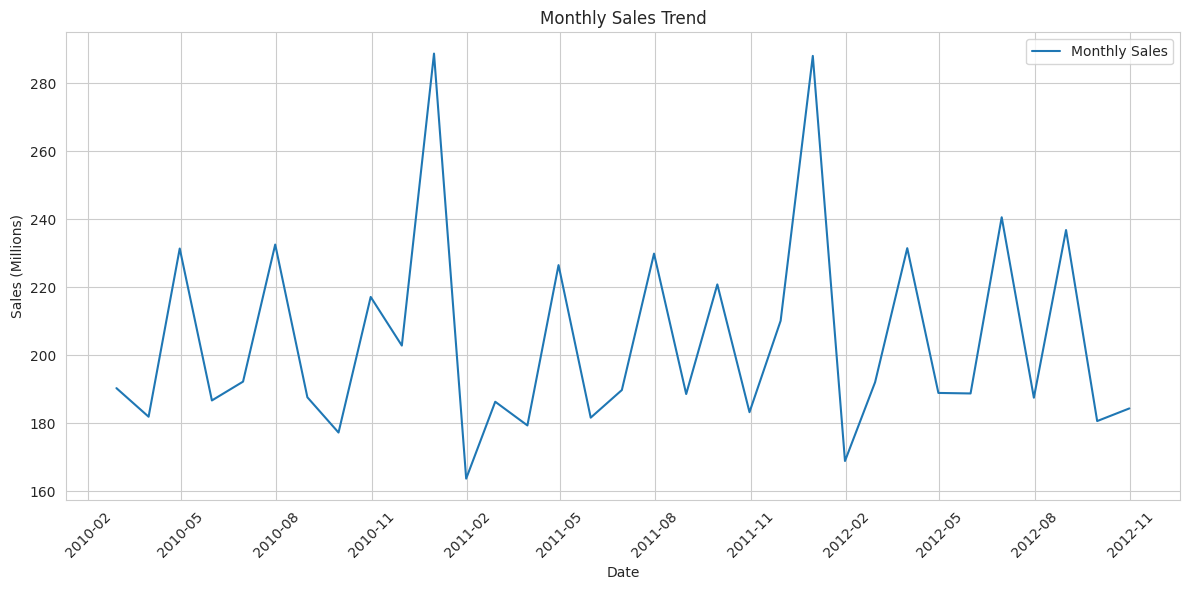

In [17]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values / 1e6, label='Monthly Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales (Millions)")
plt.xticks(rotation=45)

# Show one tick every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.tight_layout()
plt.show()

### Moving Average (3-month rolling mean)

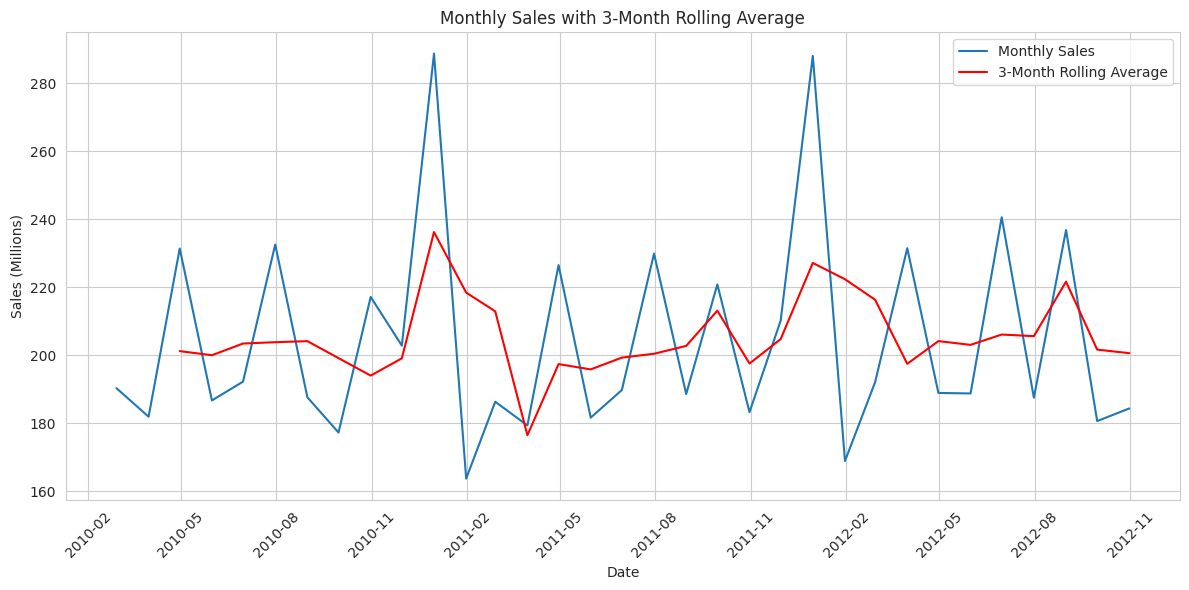

In [18]:
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))

# Plot original sales in millions
plt.plot(monthly_sales.index, monthly_sales.values / 1e6, label='Monthly Sales')

# Plot rolling mean in millions
plt.plot(rolling_mean.index, rolling_mean.values / 1e6, label='3-Month Rolling Average', color='red')

plt.title("Monthly Sales with 3-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Sales (Millions)")
plt.legend()

# Format x-axis to show only year and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set ticks every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Step 6: Revenue Breakdown

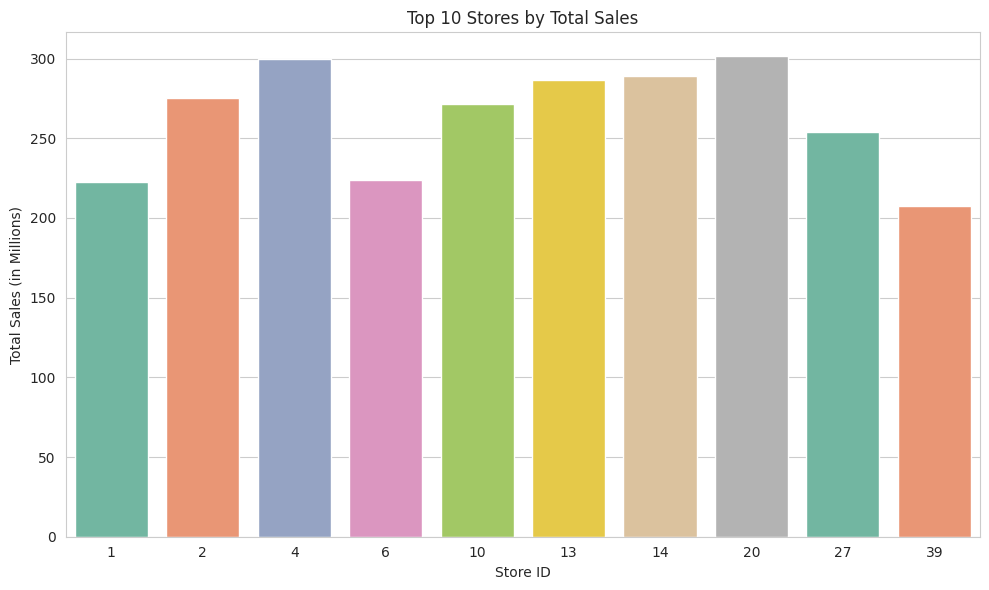

In [19]:
# Total sales by Store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Top 10 Stores by Total Sales
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_stores.index,
            y=top_stores.values / 1e6,  # convert sales to millions
            palette="Set2")

plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store ID")
plt.ylabel("Total Sales (in Millions)")
plt.tight_layout()
plt.show()

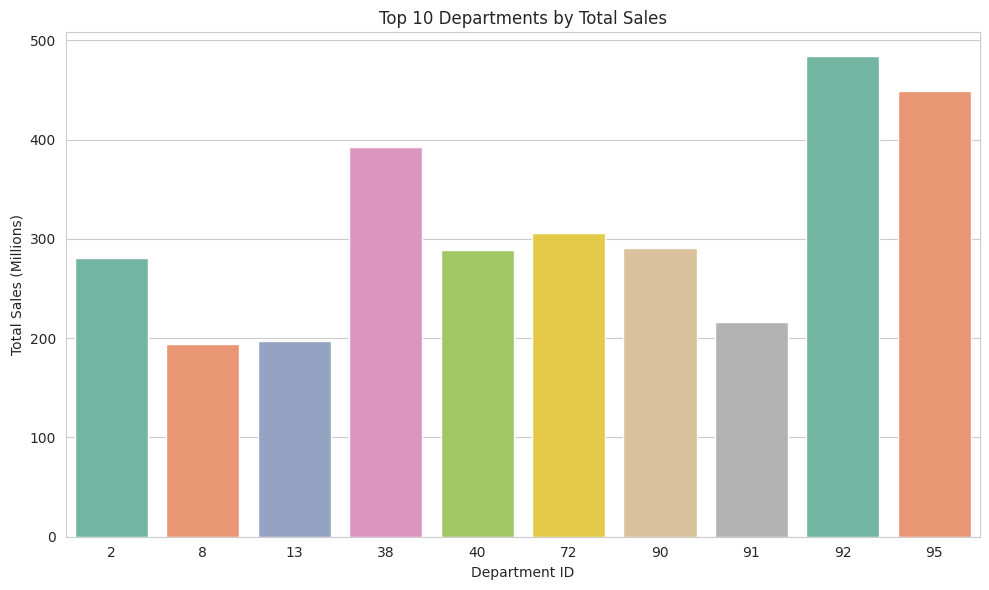

In [20]:
# Top 10 departments by total sales
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=dept_sales.index, y=dept_sales.values / 1e6, palette="Set2")  # convert to millions
plt.title("Top 10 Departments by Total Sales")
plt.ylabel("Total Sales (Millions)")
plt.xlabel("Department ID")
plt.tight_layout()
plt.show()

## Step 7: Conclusions

- Seasonal Patterns: Monthly sales exhibit clear seasonality, with predictable peaks during key shopping periods and dips in off-peak months.

- Trends: The 3-month rolling average reveals a steady upward trend in sales, smoothing short-term fluctuations.

- Store Performance: A few stores generate most of the revenue, highlighting key locations for strategic focus.

- Department Contributions: Certain departments dominate sales, indicating the importance of prioritizing high-performing product categories.

- Business Implications: Understanding these trends and patterns can inform inventory planning, marketing campaigns, and resource allocation, ensuring the retailer can optimize operations and maximize revenue.